In [1]:
%matplotlib inline
import numpy as np
from scipy import io
from matplotlib import pyplot as plt
from sklearn import svm

### Support vector machine with no kernel aka linear kernel

In [2]:
data_train = io.loadmat('ex6data1.mat')

In [3]:
X = data_train['X']
y = data_train['y']

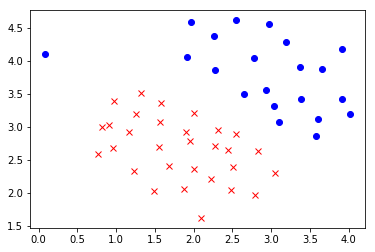

In [4]:
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'yo')

In [5]:
clf = svm.LinearSVC(C=0.25)
clf.fit(X,y.ravel())
clf.score(X,y.ravel())

0.98039215686274506

In [6]:
def decision_boundary(classifier, input_):
    return  (-classifier.intercept_ - np.dot(classifier.coef_[:, 0], input_))/ classifier.coef_[:, 1]

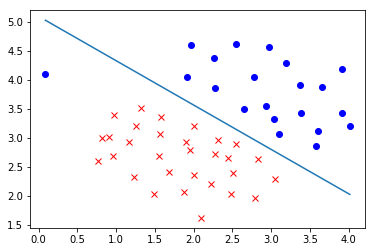

In [7]:
range_ = np.array([[np.min(X[:,0]), np.max(X[:,0])]])
plt.plot(range_.ravel(), decision_boundary(clf, range_))
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bo')

### Support vector machine with gaussian kernel aka rbf in scikit-learn

In [91]:
train_data = io.loadmat('ex6data2.mat')

In [92]:
X, y = (train_data['X'], train_data['y'])

Visualize training data set

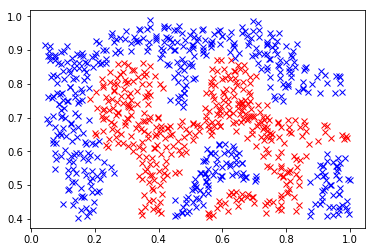

In [93]:
plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bx')

In [178]:
clf = svm.SVC(C=100, gamma=100)
clf.fit(X, y.ravel())
clf


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
clf.score(X,y)

0.99884125144843572

#### Visualize support vector machine non-linear classifier 

In [181]:
def visualize_boundary(X, y, model):
    """
    Plot training data and svm decision boundary that seperate training data
    
    Input: 
        X(ndarray) : training features
        y(ndarray) : training label
        model(svm.SVC) : support vector machine model
        
    Output: 
        None
    """
    
    # Plot X, y
    plt.plot(X[(y==0)[:,0], 0], X[(y==0)[:,0], 1], 'rx')
    plt.plot(X[(y==1)[:,0], 0], X[(y==1)[:,0], 1], 'bx')
    
    x1_plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    x2_plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
    
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    Z = np.zeros(X1.shape)
    
    for i in range(X1.shape[1]):
        this_X = np.append(X1[:,[i]], X2[:,[i]], axis=1)
        Z[:,i] = model.predict(this_X)
        
    plt.contour(X1, X2, Z)

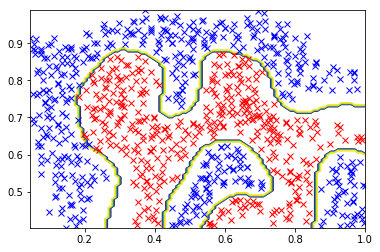

In [183]:
visualize_boundary(X, y, clf)